# TEXT SUMMARIZATION ON NEWS ARTICLES

## 1.Business/Real-world Problem

Text summarization is a challenge in natural language understanding that
grown popular due to the evolution of encoder-decoder sequence-tosequence (seq2seq) models, which have been flourishing in areas like machine translation


 Two fundamental approaches for summarization: extractive and abstractive
methods.


 Extractive summarization is representing the main points of a text without any
alteration to those points and rearranging the order of that points and the
grammar to get the soul out of the summary.

 Abstractive summarization uses advanced NLP techniques that rephrase
sentences and capture notable points of an article and produce an entirely
new summary

## 2.1. Data(CNN NEWS ARTICLES):



This dataset contains the documents from the news articles of CNN. There
are approximately 90k documents. Each article contains a story and its
highlights.



### 2.1.1. Data Overview

In [ ]:
file = open('Data/cnn/stories' + '/' + '000c835555db62e319854d9f8912061cdca1893e.story', encoding='utf-8')
text = file.read()
file.close()
text

'(CNN)For the second time during his papacy, Pope Francis has announced a new group of bishops and archbishops set to become cardinals -- and they come from all over the world.\n\nPope Francis said Sunday that he would hold a meeting of cardinals on February 14 "during which I will name 15 new Cardinals who, coming from 13 countries from every continent, manifest the indissoluble links between the Church of Rome and the particular Churches present in the world," according to Vatican Radio.\n\nNew cardinals are always important because they set the tone in the church and also elect the next pope, CNN Senior Vatican Analyst John L. Allen said. They are sometimes referred to as the princes of the Catholic Church.\n\nThe new cardinals come from countries such as Ethiopia, New Zealand and Myanmar.\n\n"This is a pope who very much wants to reach out to people on the margins, and you clearly see that in this set," Allen said. "You\'re talking about cardinals from typically overlooked places, 

####  We need to extract data after @highlight from article considering it as summary

## (data_Source: https://cs.nyu.edu/~kcho/DMQA/)



## 3) importing libraries

In [2]:
from os import listdir
import warnings
warnings.filterwarnings("ignore")
import string
from tqdm import tqdm
import re
import pandas as pd
pd.set_option('display.max_colwidth', -1)
import numpy as np
import seaborn as sns

# 4.Data_Extracting

In [ ]:
def loading_articles(file_name):
    file = open(file_name, encoding='utf-8')
    text = file.read()
    file.close()
    return text

In [ ]:
# split a document into news story and highlights
def split_story(doc):
    index = doc.find('@highlight')
    story, highlights = doc[:index], doc[index:].split('@highlight')
    highlights = [h.strip() for h in highlights if len(h) > 0]
    return story, highlights

In [ ]:
path = 'cnn_stories'
stories = list()
for name in tqdm(listdir(directory)):
    filename = directory + '/' + name
    doc = load_doc(filename)
    story, highlights = split_story(doc)
    stories.append({'story':story, 'highlights':highlights})
print('Loaded Stories %d' % len(stories))

In [ ]:
cnn_df = pd.DataFrame.from_dict(cnn_stories)
cnn_df.columns = ['article','summary']
cnn_df.to_csv('CNN_with_summary.csv',index=False)

In [ ]:
CNN=pd.read_csv('Data/CNN_with_summary.csv')
CNN.head(1)

article  \
0  It 's official : U.S. President Barack Obama wants lawmakers to weigh in on whether to use military force in Syria .\n\nObama sent a letter to the heads of the House and Senate on Saturday night , hours after announcing that he believes military action against Syrian targets is the right step to take over the alleged use of chemical weapons .\n\nThe proposed legislation from Obama asks Congress to approve the use of military force `` to deter , disrupt , prevent and degrade the potential for future uses of chemical weapons or other weapons of mass destruction . ''\n\nIt 's a step that is set to turn an international crisis into a fierce domestic political battle .\n\nThere are key questions looming over the debate : What did U.N. weapons inspectors find in Syria ? What happens if Congress votes no ? And how will the Syrian government react ?\n\nIn a televised address from the White House Rose Garden earlier Saturday , the president said he would take his case to Congress , not because he has to -- but because he wants to .\n\n`` While I believe I have the authority to carry out this military action without specific congressional authorization , I know that the country will be stronger if we take this course , and our actions will be even more effective , '' he said . `` We should have this debate , because the issues are too big for business as usual . ''\n\nObama said top congressional leaders had agreed to schedule a debate when the body returns to Washington on September 9 . The Senate Foreign Relations Committee will hold a hearing over the matter on Tuesday , Sen. Robert Menendez said .\n\nTranscript : Read Obama 's full remarks\n\nSyrian crisis : Latest developments\n\nU.N. inspectors leave Syria\n\nObama 's remarks came shortly after U.N. inspectors left Syria , carrying evidence that will determine whether chemical weapons were used in an attack early last week in a Damascus suburb .\n\n`` The aim of the game here , the mandate , is very clear -- and that is to ascertain whether chemical weapons were used -- and not by whom , '' U.N. spokesman Martin Nesirky told reporters on Saturday .\n\nBut who used the weapons in the reported toxic gas attack in a Damascus suburb on August 21 has been a key point of global debate over the Syrian crisis .\n\nTop U.S. officials have said there 's no doubt that the Syrian government was behind it , while Syrian officials have denied responsibility and blamed jihadists fighting with the rebels .\n\nBritish and U.S. intelligence reports say the attack involved chemical weapons , but U.N. officials have stressed the importance of waiting for an official report from inspectors .\n\nThe inspectors will share their findings with U.N. Secretary-General Ban Ki-moon Ban , who has said he wants to wait until the U.N. team 's final report is completed before presenting it to the U.N. Security Council .\n\nThe Organization for the Prohibition of Chemical Weapons , which nine of the inspectors belong to , said Saturday that it could take up to three weeks to analyze the evidence they collected .\n\n`` It needs time to be able to analyze the information and the samples , '' Nesirky said .\n\nHe noted that Ban has repeatedly said there is no alternative to a political solution to the crisis in Syria , and that `` a military solution is not an option . ''\n\nBergen : Syria is a problem from hell for the U.S.\n\nObama : ` This menace must be confronted '\n\nObama 's senior advisers have debated the next steps to take , and the president 's comments Saturday came amid mounting political pressure over the situation in Syria . Some U.S. lawmakers have called for immediate action while others warn of stepping into what could become a quagmire .\n\nSome global leaders have expressed support , but the British Parliament 's vote against military action earlier this week was a blow to Obama 's hopes of getting strong backing from key NATO allies .\n\nOn Saturday , Obama proposed what he said wou

## 5. Data Cleaning and Preprocessing

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
CNN=pd.read_csv('/content/gdrive/My Drive/CNN_with_summary.csv')


article                                                                                                                                                                                                                                                                                                                 summary
0  It 's official : U.S. President Barack Obama wants lawmakers to weigh in on whether to use military force in Syria .\n\nObama sent a letter to the heads of the House and Senate on Saturday night , hours after announcing that he believes military action against Syrian targets is the right step to take over the alleged use of chemical weapons .\n\nThe proposed legislation from Obama asks Congress to approve the use of military force `` to deter , disrupt , prevent and degrade the potential for future uses of chemical weapons or other weapons of mass destruction . ''\n\nIt 's a step that is set to turn an international crisis into a fierce domestic political battle .\n\nThere are key questions looming over the debate : What did U.N. weapons inspectors find in Syria ? What happens if Congress votes no ? And how will the Syrian government react ?\n\nIn a televised address from the White House Rose Garden earlier Saturday , the president said he would take his case to Congress , not because he has to -- but because he wants to .\n\n`` While I believe I have the authority to carry out this military action without specific congressional authorization , I know that the country will be stronger if we take this course , and our actions will be even more effective , '' he said . `` We should have this debate , because the issues are too big for business as usual . ''\n\nObama said top congressional leaders had agreed to schedule a debate when the body returns to Washington on September 9 . The Senate Foreign Relations Committee will hold a hearing over the matter on Tuesday , Sen. Robert Menendez said .\n\nTranscript : Read Obama 's full remarks\n\nSyrian crisis : Latest developments\n\nU.N. inspectors leave Syria\n\nObama 's remarks came shortly after U.N. inspectors left Syria , carrying evidence that will determine whether chemical weapons were used in an attack early last week in a Damascus suburb .\n\n`` The aim of the game here , the mandate , is very clear -- and that is to ascertain whether chemical weapons were used -- and not by whom , '' U.N. spokesman Martin Nesirky told reporters on Saturday .\n\nBut who used the weapons in the reported toxic gas attack in a Damascus suburb on August 21 has been a key point of global debate over the Syrian crisis .\n\nTop U.S. officials have said there 's no doubt that the Syrian government was behind it , while Syrian officials have denied responsibility and blamed jihadists fighting with the rebels .\n\nBritish and U.S. intelligence reports say the attack involved chemical weapons , but U.N. officials have stressed the importance of waiting for an official report from inspectors .\n\nThe inspectors will share their findings with U.N. Secretary-General Ban Ki-moon Ban , who has said he wants to wait until the U.N. team 's final report is completed before presenting it to the U.N. Security Council .\n\nThe Organization for the Prohibition of Chemical Weapons , which nine of the inspectors belong to , said Saturday that it could take up to three weeks to analyze the evidence they collected .\n\n`` It needs time to be able to analyze the information and the samples , '' Nesirky said .\n\nHe noted that Ban has repeatedly said there is no alternative to a political solution to the crisis in Syria , and that `` a military solution is not an option . ''\n\nBergen : Syria is a problem from hell for the U.S.\n\nObama : ` This menace must be confronted '\n\nObama 's senior advisers have debated the next steps to take , and the president 's comments Saturday came amid mounting political pressure over the situation in Syria . Some U.S. lawmakers have called for immediate action while ot

In [ ]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

### Story Preprocessing

In [ ]:
article_text=[]
for i in CNN.article.values:
    tt=re.sub(r'\n',' ', i)
    tt=re.sub(r'>',' ', tt)
    tt=re.sub(r'<',' ', tt)
    tt=re.sub(r'(CNN)',' ', tt)
    tt=re.sub(r'LRB',' ', tt)
    tt=re.sub(r'RRB',' ', tt)
    tt = re.sub(r'[" "]+', " ", tt)
    tt=re.sub(r'-- ',' ', tt)
    tt=re.sub(r"([?!¿])", r" \1 ", tt)
    tt=re.sub(r'-',' ', tt)
    tt=tt.replace('/',' ')
    tt=re.sub(r'\s+', ' ', tt)
    tt=decontracted(tt)
    tt = re.sub('[^A-Za-z0-9.,]+', ' ', tt)
    tt = tt.lower()
    article_text.append(tt)

In [ ]:
data_article=pd.DataFrame(article_text,columns=['Article'])

### Summary_Preprocessing

In [ ]:
summary_text=[]
for i in CNN.summary.values:
    tt=re.sub(r'\n',' ', i)
    tt=re.sub(r'>',' ', tt)
    tt=re.sub(r'<',' ', tt)
    tt=re.sub(r'-',' ', tt)
    tt=re.sub(r'(CNN)',' ', tt)
    tt=re.sub(r'LRB',' ', tt)
    tt=re.sub(r'RRB',' ', tt)

    tt = re.sub(r'[" "]+', " ", tt)
    tt=re.sub(r'-- ',' ', tt)
    tt=tt.replace('/',' ')
    tt=re.sub(r'\s+', ' ', tt)
    tt=decontracted(tt)
    tt = re.sub('[^A-Za-z0-9.]+', ' ', tt)
    tt = tt.lower()
    summary_text.append(tt)

In [ ]:
summary_text=np.array(summary_text)
summary_text=summary_text.reshape(-1,1)

In [ ]:
data_summ=pd.DataFrame(summary_text,columns=['Summary'])

In [ ]:
data_cleaned=data_article.join(data_summ)


Article                                                                                                                                                                                                                                                                                        Summary
0  it is official u.s. president barack obama wants lawmakers to weigh in on whether to use military force in syria . obama sent a letter to the heads of the house and senate on saturday night , hours after announcing that he believes military action against syrian targets is the right step to take over the alleged use of chemical weapons . the proposed legislation from obama asks congress to approve the use of military force to deter , disrupt , prevent and degrade the potential for future uses of chemical weapons or other weapons of mass destruction . it is a step that is set to turn an international crisis into a fierce domestic political battle . there are key questions looming over the debate what did u.n. weapons inspectors find in syria what happens if congress votes no and how will the syrian government react in a televised address from the white house rose garden earlier saturday , the president said he would take his case to congress , not because he has to but because he wants to . while i believe i have the authority to carry out this military action without specific congressional authorization , i know that the country will be stronger if we take this course , and our actions will be even more effective , he said . we should have this debate , because the issues are too big for business as usual . obama said top congressional leaders had agreed to schedule a debate when the body returns to washington on september 9 . the senate foreign relations committee will hold a hearing over the matter on tuesday , sen. robert menendez said . transcript read obama is full remarks syrian crisis latest developments u.n. inspectors leave syria obama is remarks came shortly after u.n. inspectors left syria , carrying evidence that will determine whether chemical weapons were used in an attack early last week in a damascus suburb . the aim of the game here , the mandate , is very clear and that is to ascertain whether chemical weapons were used and not by whom , u.n. spokesman martin nesirky told reporters on saturday . but who used the weapons in the reported toxic gas attack in a damascus suburb on august 21 has been a key point of global debate over the syrian crisis . top u.s. officials have said there is no doubt that the syrian government was behind it , while syrian officials have denied responsibility and blamed jihadists fighting with the rebels . british and u.s. intelligence reports say the attack involved chemical weapons , but u.n. officials have stressed the importance of waiting for an official report from inspectors . the inspectors will share their findings with u.n. secretary general ban ki moon ban , who has said he wants to wait until the u.n. team is final report is completed before presenting it to the u.n. security council . the organization for the prohibition of chemical weapons , which nine of the inspectors belong to , said saturday that it could take up to three weeks to analyze the evidence they collected . it needs time to be able to analyze the information and the samples , nesirky said . he noted that ban has repeatedly said there is no alternative to a political solution to the crisis in syria , and that a military solution is not an option . bergen syria is a problem from hell for the u.s. obama this menace must be confronted obama is senior advisers have debated the next steps to take , and the president is comments saturday came amid mounting political pressure over the situation in syria . some u.s. lawmakers have called for immediate action while others warn of stepping into what could become a quagmire . some global leaders have expressed support , but the british parliament is vote against military act

In [ ]:
data_cleaned.to_csv('/content/gdrive/My Drive/data_cleaned1.csv',index=False)

In [3]:
data_cleaned=pd.read_csv('/content/gdrive/My Drive/data_cleaned1.csv')


# 6.Data_Analysis

### length of articles

In [4]:
art_len = []
for i in data_cleaned.Article.values:
    art_len.append(len(i.split()))

In [5]:
import numpy as np

b = [i for i in range(0,100,10)]

for i in b:
    print(i,'th percentile is ', np.percentile(art_len, i)) 


0 th percentile is  0.0
10 th percentile is  264.0
20 th percentile is  354.0
30 th percentile is  438.0
40 th percentile is  527.0
50 th percentile is  624.0
60 th percentile is  727.0
70 th percentile is  838.0
80 th percentile is  967.0
90 th percentile is  1166.0


In [6]:
import numpy as np

b = [i for i in range(90,100)]

for i in b:
    print(i,'th percentile is ', np.percentile(art_len, i)) 


90 th percentile is  1166.0
91 th percentile is  1196.0
92 th percentile is  1228.0
93 th percentile is  1260.0
94 th percentile is  1299.0
95 th percentile is  1344.0999999999913
96 th percentile is  1397.0
97 th percentile is  1460.0
98 th percentile is  1542.0
99 th percentile is  1653.0


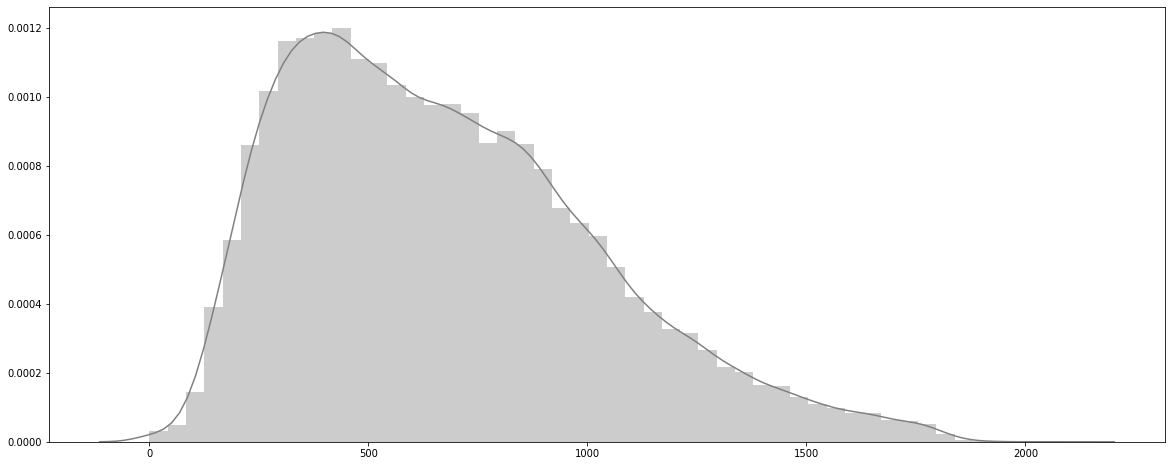

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
sns.distplot(art_len,color='grey');

#### From above observations it is clear that most of the articles have lengthmore than 500 

### length of Summaries


In [7]:
summ_len = []
for i in data_cleaned.Summary.values:
    summ_len.append(len(i.split()))

In [8]:
import numpy as np
b = [i for i in range(90,100)]
for i in b:
    print(i,'th percentile is ', np.percentile(summ_len, i)) 

90 th percentile is  56.0
91 th percentile is  57.0
92 th percentile is  57.0
93 th percentile is  58.0
94 th percentile is  58.0
95 th percentile is  59.0
96 th percentile is  60.0
97 th percentile is  61.0
98 th percentile is  62.0
99 th percentile is  64.0


In [9]:
b = [i for i in range(90,100)]
for i in b:
    print(i,'th percentile is ', np.percentile(summ_len, i)) 

90 th percentile is  56.0
91 th percentile is  57.0
92 th percentile is  57.0
93 th percentile is  58.0
94 th percentile is  58.0
95 th percentile is  59.0
96 th percentile is  60.0
97 th percentile is  61.0
98 th percentile is  62.0
99 th percentile is  64.0


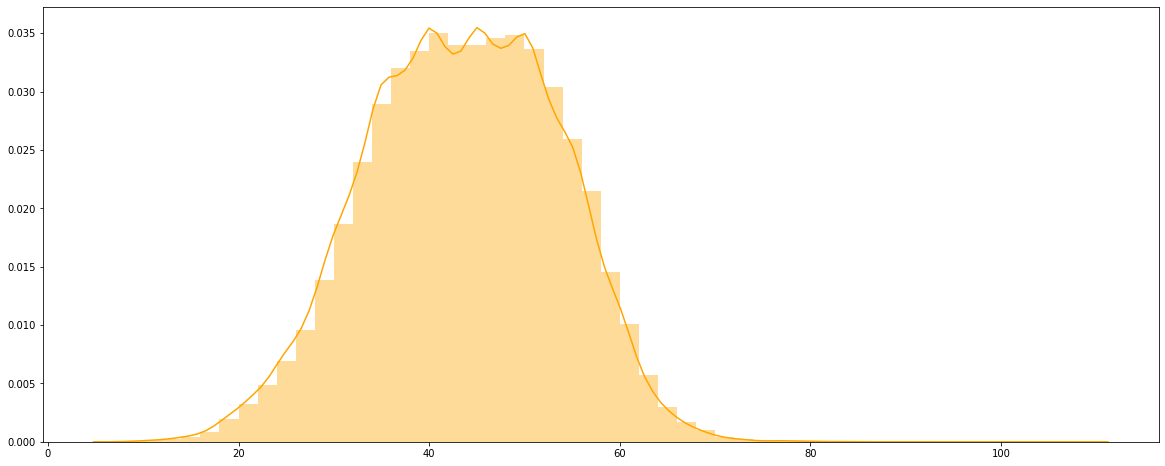

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
sns.distplot(summ_len,color='orange');

#### There is no skewness in summaries length most of them have length of 30-60 

## Calculating 90th percentile summary length confidence intervel 

In [10]:
import random
from statistics import stdev,mean
percentiles_90=[]
for i in range(0,200):
    samples=random.sample(summ_len,50000)     ## taking 50000 random lengths from summary 
    samples2=random.choices(samples,k=42579)  ## taking 42579 samples ith replacement from above samples 
    g=np.percentile(samples+samples2, 90)     
    percentiles_90.append(g) 
mean = np.round(mean(percentiles_90),3)
print("mean =",mean)
std = np.round(stdev(percentiles_90),3)
print("std =",std)

mean = 56.0
std = 0.0


In [11]:
sample_size=200
left_limit = np.round(mean - 2*(std/np.sqrt(sample_size)), 3)
right_limit = np.round(mean + 2*(std/np.sqrt(sample_size)), 3)
print("95% of CI for MSE=",[left_limit,right_limit])

95% of CI for MSE= [56.0, 56.0]


## Calculating 90th percentile article length confidence intervel 

In [12]:
from random import sample 
from statistics import stdev,mean
percentiles_90=[]
for i in range(0,200):
    samples=random.sample(art_len,50000)     ## taking 50000 random lengths from summary 
    samples2=random.choices(samples,k=42579)  ## taking 42579 samples ith replacement from above samples 
    g=np.percentile(samples+samples2, 90) 
    percentiles_90.append(g) 

In [13]:
mean = np.round(mean(percentiles_90),3)
print("mean =",mean)
std = np.round(stdev(percentiles_90),3)
print("std =",std)

mean = 1166.211
std = 3.242


In [14]:
sample_size=200
left_limit = np.round(mean - 2*(std/np.sqrt(sample_size)), 3)
right_limit = np.round(mean + 2*(std/np.sqrt(sample_size)), 3)
print("95% of CI for MSE=",[left_limit,right_limit])

95% of CI for MSE= [1165.753, 1166.669]


## Calculating 95th percentile summary length confidence intervel 

In [15]:
from statistics import stdev,mean
percentiles_95=[]
for i in range(0,200):
    samples=random.sample(summ_len,50000)     ## taking 50000 random lengths from summary 
    samples2=random.choices(samples,k=42579)  ## taking 42579 samples ith replacement from above samples 
    g=np.percentile(samples+samples2, 95)  
    percentiles_95.append(g) 

In [16]:
mean = np.round(mean(percentiles_95),3)
print("mean =",mean)
std = np.round(stdev(percentiles_95),3)
print("std =",std)

mean = 59.0
std = 0.0


In [17]:
sample_size=200
left_limit = np.round(mean - 2*(std/np.sqrt(sample_size)), 3)
right_limit = np.round(mean + 2*(std/np.sqrt(sample_size)), 3)
print("95% of CI for MSE=",[left_limit,right_limit])

95% of CI for MSE= [59.0, 59.0]


## Calculating 95th percentile article length confidence intervel 

In [18]:
from statistics import stdev,mean
percentiles_95=[]
for i in range(0,200):
    samples=random.sample(art_len,50000)     ## taking 50000 random lengths from summary 
    samples2=random.choices(samples,k=42579)  ## taking 42579 samples ith replacement from above samples 
    g=np.percentile(samples+samples2, 95)  
    percentiles_95.append(g) 

In [19]:
mean = np.round(mean(percentiles_95),3)
print("mean =",mean)
std = np.round(stdev(percentiles_95),3)
print("std =",std)

mean = 1344.314
std = 3.524


In [20]:
sample_size=200
left_limit = np.round(mean - 2*(std/np.sqrt(sample_size)), 3)
right_limit = np.round(mean + 2*(std/np.sqrt(sample_size)), 3)
print("95% of CI for MSE=",[left_limit,right_limit])

95% of CI for MSE= [1343.816, 1344.812]


### Word_cloud for summary

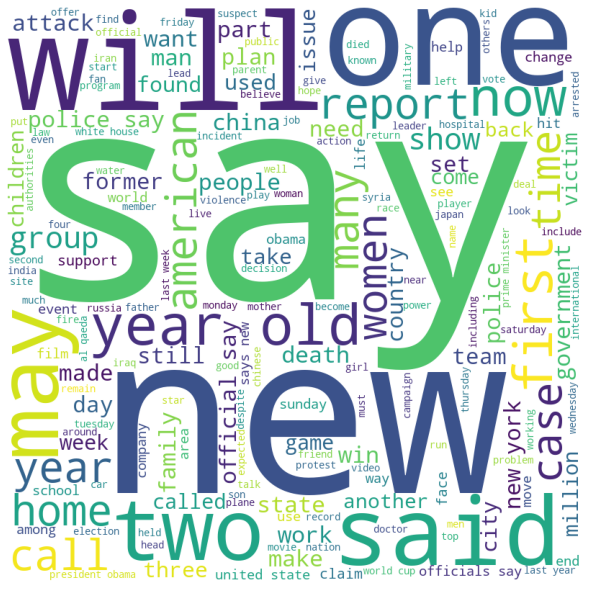

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
 
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in data_cleaned.Summary: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### It make sense that most of the verbs and nouns are used in summary

## POS Tagging to Summary tokens

In [ ]:
import spacy
sum_pos=[]
nlp = spacy.load("en_core_web_lg")
for i in tqdm(data_cleaned.Summary.values):
    pos_tag=[]
    doc = nlp(i)
    for token in doc:
        pos_tag.append(token.pos_)
    sum_pos.append(pos_tag)

100%|██████████| 92579/92579 [17:47<00:00, 86.69it/s]


## Distribution of nouns and propernouns in summary 

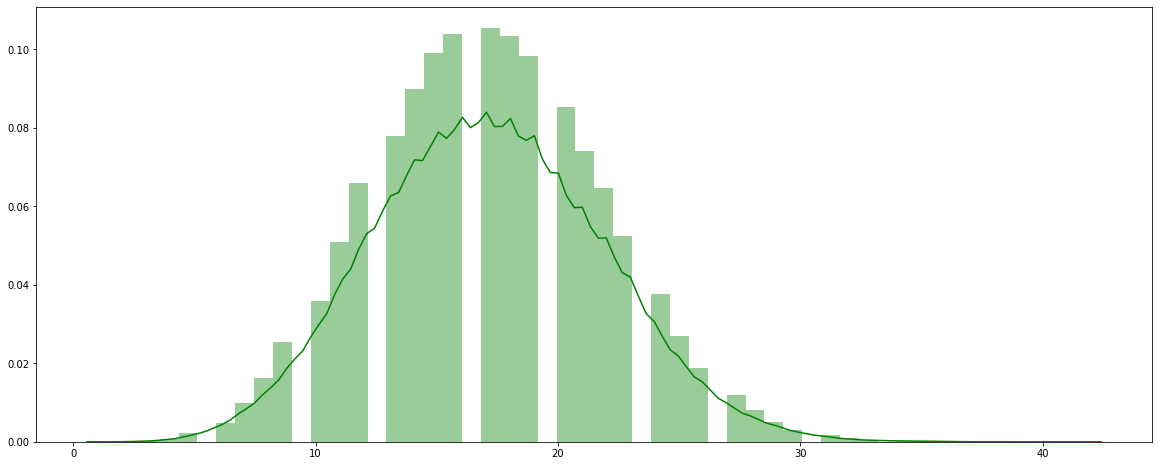

In [ ]:
noun_count=[]
for i in sum_pos:
    lent = i.count('NOUN')
    lentl = i.count('PROPN')
    noun_count.append(lent+lentl)
plt.figure(figsize=(20,8))
sns.distplot(noun_count,color='green');

## nouns and propernouns percentage in summary

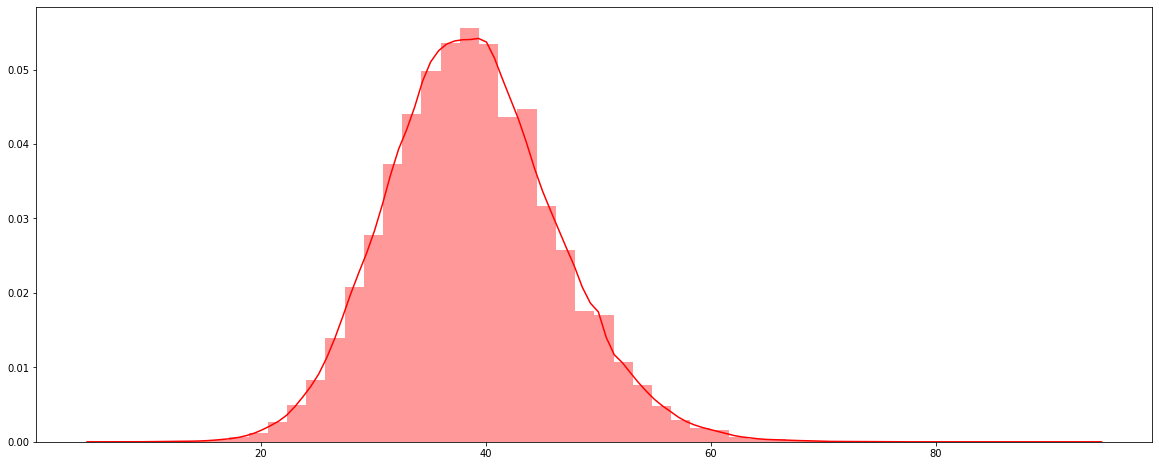

In [ ]:
noun_percent=[]
for i in sum_pos:
    lent = i.count('NOUN')
    lentl = i.count('PROPN')
    noun=((lent+lentl)/len(i))*100
    noun_percent.append(noun)
plt.figure(figsize=(20,8))
sns.distplot(noun_percent,color='red');

#### As we obeserved in word cloud 30 -40 percent of words in summary are Nouns

## Distribution of verbs

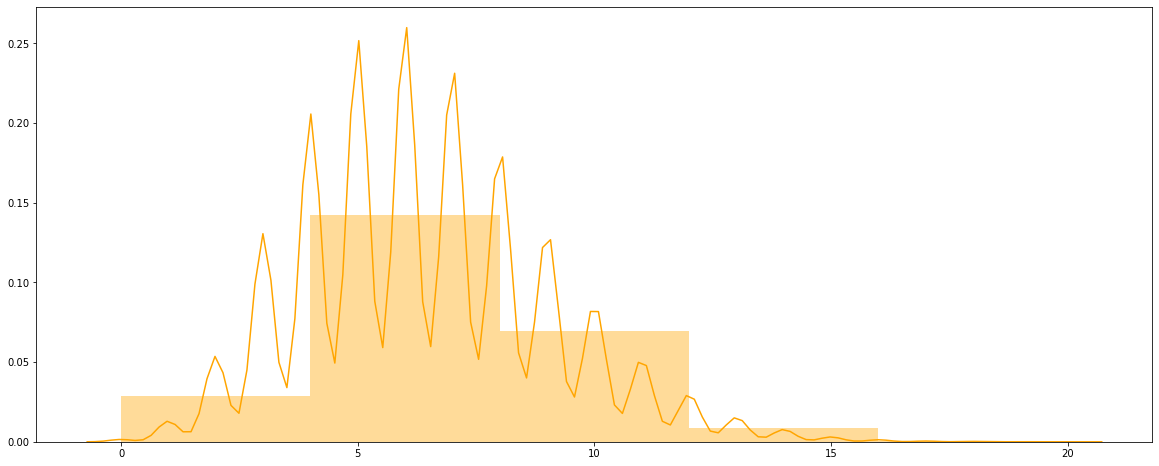

In [ ]:
verb_count=[]
for i in sum_pos:
    lent = i.count('VERB')
    verb_count.append(lent)
plt.figure(figsize=(20,8))
sns.distplot(verb_count,bins=5,color='orange');

## Verb percentage in summary

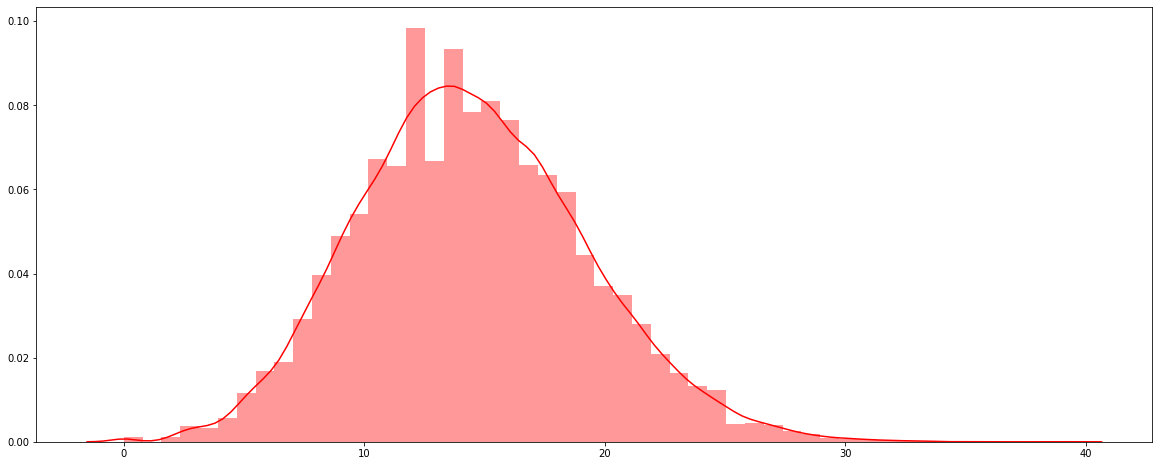

In [ ]:
verb_percent=[]
for i in sum_pos:
    lent = i.count('VERB')
    verb=(lent/len(i))*100
    verb_percent.append(verb)
plt.figure(figsize=(20,8))
sns.distplot(verb_percent,color='red');

## POS tagging to articles

---



In [ ]:
import spacy
art_pos=[]
nlp = spacy.load("en_core_web_lg")
for i in tqdm(data_cleaned.Article.values):
    pos_taga=[]
    doc = nlp(i)
    for token in doc:
        pos_taga.append(token.pos_)
    art_pos.append(pos_taga)

100%|██████████| 92579/92579 [2:42:50<00:00,  9.47it/s]



### Nouns and Proper nouns percentage in articles 



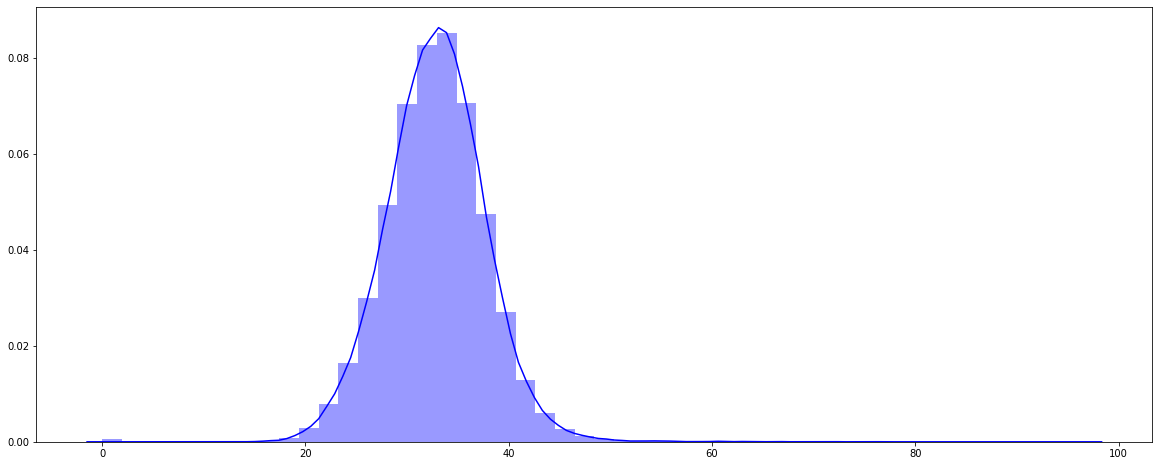

In [ ]:
noun_percent=[]
for i in art_pos:
    lent = i.count('NOUN')
    lentl = i.count('PROPN')
    noun=((lent+lentl)/len(i))*100
    noun_percent.append(noun)
plt.figure(figsize=(20,8))
sns.distplot(noun_percent,color='blue');

## Verbs_percentage

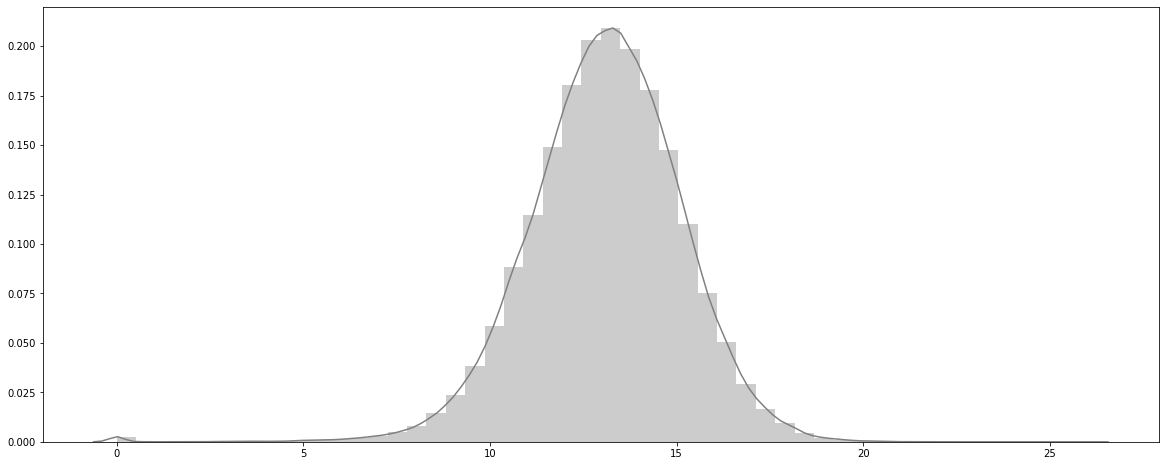

In [ ]:
verb_percent=[]
for i in art_pos:
    lent = i.count('VERB')
    verb=(lent/len(i))*100
    verb_percent.append(verb)
plt.figure(figsize=(20,8))
sns.distplot(verb_percent,color='grey');



## Visualising Named Entities in text


#### named entity is a real-world object, such as persons, locations, organizations, products, etc., that can be denoted with a proper name. It can be abstract or have a physical existence


In [ ]:
import spacy
from spacy import displacy
from IPython.core.display import display, HTML
nlp = spacy.load("en_core_web_lg")

doc2 = nlp(data_cleaned.Article.values[2])
displacy.render(doc2, style="ent",jupyter=True)

In [ ]:
import spacy
from spacy import displacy
from IPython.core.display import display, HTML
nlp = spacy.load("en_core_web_lg")

doc2 = nlp(data_cleaned.Summary.values[2])
displacy.render(doc2, style="ent",jupyter=True)

##### There is high probability of considering sentence containing ORG entity as summary





## Appending named entities for all articles and summaries for further analysis

In [ ]:
import spacy

sum_ent=[]
nlp = spacy.load("en_core_web_lg")
for i in tqdm(data_cleaned.Summary.values):
    pos_tag=[]
    doc = nlp(i)
    for token in doc.ents:
        pos_tag.append(token.label_)
    sum_ent.append(pos_tag)

100%|██████████| 92579/92579 [21:30<00:00, 71.77it/s]


In [ ]:
import spacy

art_ent=[]
nlp = spacy.load("en_core_web_lg")
for i in tqdm(data_cleaned.Article.values):
    pos_tag=[]
    doc = nlp(i)in
    for token in doc.ents:
        pos_tag.append(token.label_)
    art_ent.append(pos_tag)

100%|██████████| 92579/92579 [2:35:18<00:00,  9.93it/s]


## Percentage distribution of named entities in summaries

Text(0.5, 1.0, 'Percentage distribution of named entities in summaries')

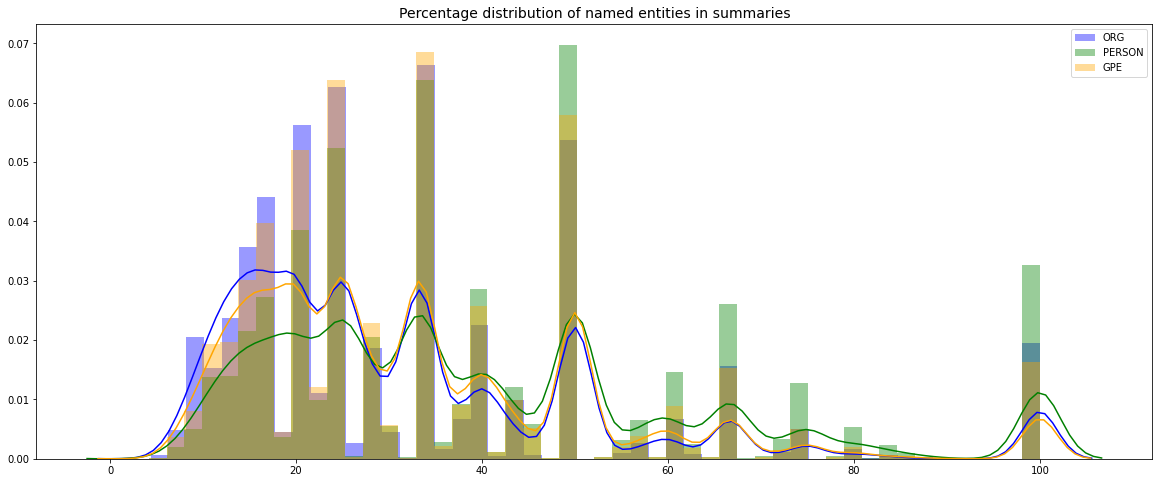

In [ ]:
org_percent=[]
per_percent=[]
gpe_percent=[]
for i in sum_ent:
    lent1 = i.count('ORG')
    lent2 = i.count('PERSON')
    lent3 = i.count('GPE')
    if lent1>0:
        lent_org=(lent1/len(i))*100
    if lent2>0:
        lent_per=(lent2/len(i))*100
    if lent3>0:
        lent_gpe=(lent3/len(i))*100
    
    org_percent.append(lent_org)
    per_percent.append(lent_per)
    gpe_percent.append(lent_gpe)
plt.figure(figsize=(20,8))
sns.distplot(org_percent,color='blue');
sns.distplot(per_percent,color='green');
sns.distplot(gpe_percent,color='orange');
plt.legend(['ORG', 'PERSON', 'GPE'])
plt.title("Percentage distribution of named entities in summaries", size=14)

### Observations


1) Most of the summaries are in range of length 30-50

2) Each summary has average of 20 nouns and 10 verbs which makes 60 percent of total words in summary 

3) Named entity is a specific kind of chunk extraction that uses entity tags which includes person,location,organisation,time expressions, quantities, monetary values, percentages . Most of the news article are based on these entites so we can assume they have high significance in summaries. 

4) From the visualisation of named entities  we can say that there is high probability of considering sentence containing ORG entity as summary. As article has only two 'org' entites  'gsa' org entity selected in summary 